<a href="https://colab.research.google.com/github/TaufiqueSekh/Decision-Trees-and-Random-Forests-in-Python/blob/main/Decision_Trees_and_Random_Forests_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Trees and Random Forests with python
##### By Taufique Sekh
##### For the code and dataset visit: 

### Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Get the data

In [3]:
df=pd.read_csv("/content/kyphosis.csv")

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Eplore the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
# Check if there are any null value in the data
df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

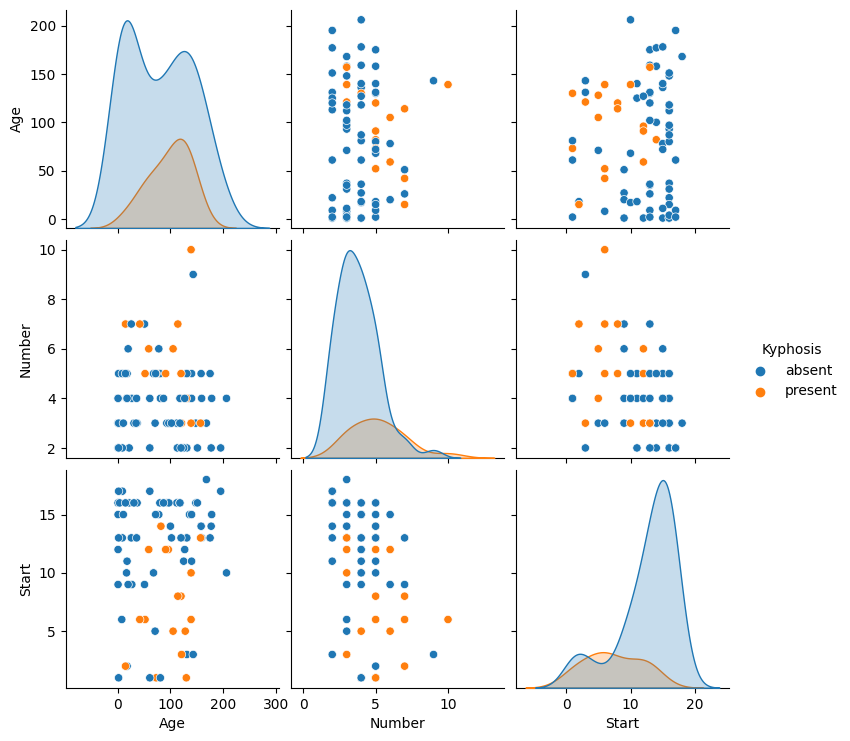

In [8]:
sns.pairplot(df,hue='Kyphosis')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt=DecisionTreeClassifier()

In [14]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
pred=dt.predict(X_test)

### Evaluating the Model


In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print("classification Report : \n",classification_report(y_test,pred))
print("confusion Matrix : \n",confusion_matrix(y_test,pred))

classification Report : 
               precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25

confusion Matrix : 
 [[12  5]
 [ 6  2]]


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc=RandomForestClassifier(n_estimators=200)

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [21]:
rfc_pred=rfc.predict(X_test)

In [22]:
print("classification Report : \n",classification_report(y_test,rfc_pred))
print("confusion Matrix : \n",confusion_matrix(y_test,rfc_pred))

classification Report : 
               precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25

confusion Matrix : 
 [[17  0]
 [ 6  2]]


## Visualizing Decision Trees


In [23]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from sklearn import tree


In [25]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


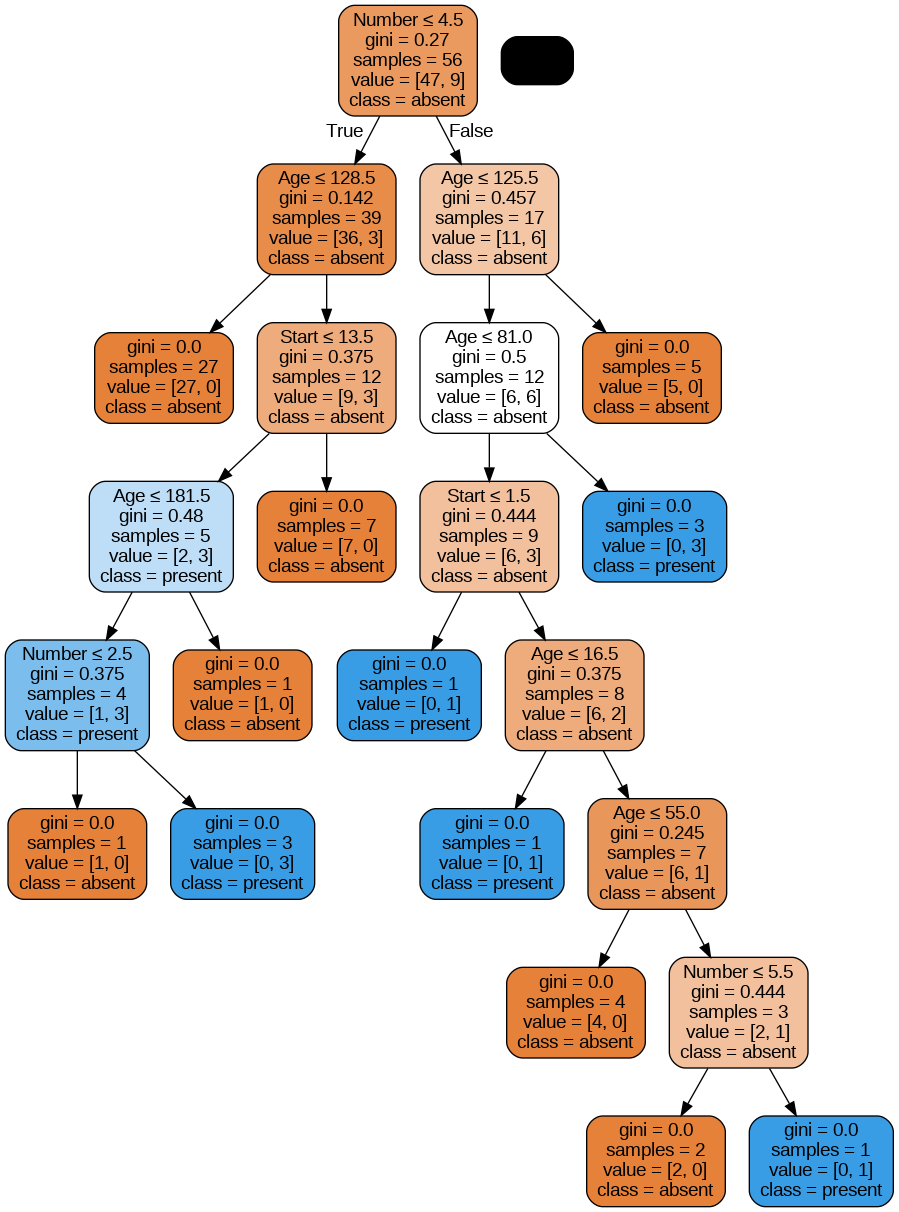

In [29]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['absent','present'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())